# Lattice visualisation and unit cells

## Setup

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as  plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
def gauplot(centers, radii, xr=None, yr=None, cmap=None, extent=None, resolution=1000, **kwargs): 
    # x, y grid
    nx, ny = resolution, resolution # Resolution
    xgrid, ygrid = np.mgrid[xr[0]:xr[1]:(xr[1]-xr[0])/nx,yr[0]:yr[1]:(yr[1]-yr[0])/ny]
    # Fill image with transparent values
    im = xgrid*0 + np.nan
    xs, ys = np.array([np.nan]), np.array([np.nan])
    cmap.set_bad((0,0,0,0)) # Transparent
    # Angles
    fis = np.concatenate((np.linspace(-np.pi, np.pi, 100), [np.nan]) )
    # Compute Gaussians
    thresh = 3 # Roughly determines radius
    for cen,rad in zip(centers,radii):
        curim = (((xgrid-cen[0])**2 + (ygrid-cen[1])**2)**0.5) / rad * thresh
        im[curim<thresh] = np.exp(-0.5 * curim**2)[curim<thresh]
        xs = np.append(xs, cen[0] + rad * np.cos(fis))
        ys = np.append(ys, cen[1] + rad * np.sin(fis))
    # Plot
    if extent is None:
        extent = [xr[0], xr[1], yr[0], yr[1]]
    plt.imshow(im.T, cmap=cmap, extent=extent, origin='lower', **kwargs)

def draw_bonds(x, y, threshold, **kwargs):
    """Draw bonds between points (x, y) that are closer than threshold."""
    # Pairwise differences 
    dx = x[:, np.newaxis] - x[np.newaxis, :]
    dy = y[:, np.newaxis] - y[np.newaxis, :]
    # Euclidean distances
    distances = np.sqrt(dx**2 + dy**2)
    # Pairs below threshold
    pairs = np.where((distances < threshold) & (distances > 0))
    # Loop through the pairs and plot lines between close points
    for i, j in zip(pairs[0], pairs[1]):
        plt.plot([x[i], x[j]], [y[i], y[j]], 
                 **kwargs)

In [3]:
# LaTeX-style matplotlib figures
def latex_fig_param():
    plt.rcParams['font.size'] = 24
    plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Computer Modern']

# Default matplotlib - clear all settings
def default_fig_param():
    plt.rcParams.update(plt.rcParamsDefault)


## Fig. 1b

In [4]:
# PLD parameters
q = 2 * np.pi / 3
alpha = 0.15
theta_x = 0 * np.pi
theta_y = 2/3 * np.pi

# Grid
num = 4
n = np.arange(-num, num+1, dtype=float)
M, N = np.meshgrid(n, n)

# Equilibrium positions
rM0 = M
rN0 = N

# Displacemenets
uM = 2 * alpha / np.sqrt(3) * np.sin(q * (rM0 + rN0) + theta_x)
uN = 2 * alpha / np.sqrt(3) * np.sin(q * (rM0 + rN0) + theta_y)

# Displaced positions
rM = rM0 + uM
rN = rN0 + uN

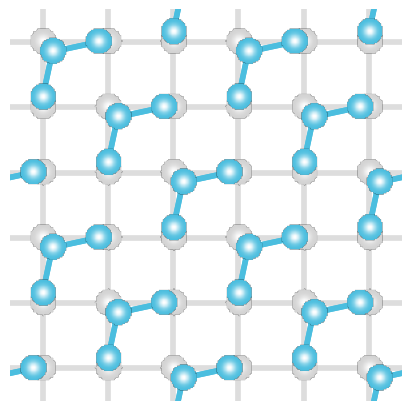

In [5]:
# Plot setup
ylim = [-2.5, 3.5]
xlim = [-2.5, 3.5]
plt.figure(figsize=(4, 4), layout='constrained')
plt.axis('off')
plt.xlim(xlim)
plt.ylim(ylim)

# Parameters
resolution = 300
radius = 0.2

# Undistorted lattice
centers = np.stack((rM0.flatten(), rN0.flatten())).T
radii = radius * np.ones(len(centers))
cmap = LinearSegmentedColormap.from_list("cmap", ['lightgray', "white"])
gauplot(centers, radii, xlim, ylim, cmap=cmap, resolution=resolution, zorder=9)
draw_bonds(rM0.flatten(), rN0.flatten(), 1.01, color=cmap(0), linestyle='-', lw=4, alpha=0.5)

# Distorted lattice
centers = np.stack((rM.flatten(), rN.flatten())).T
radii = radius * np.ones(len(centers))
cmap = LinearSegmentedColormap.from_list("cmap", [(75/255, 190/255, 223/255), "white"])
gauplot(centers, radii, xlim, ylim, cmap=cmap, resolution=resolution, zorder=10)
draw_bonds(rM.flatten(), rN.flatten(), 1.01, color=cmap(0), linestyle='-', lw=4, alpha=1)

plt.show()

## Fig. 4b, 4c

Set the <code>gnd</code> variable to <code>True</code> to get Figure 4b and to <code>False</code> to get Fig. 4c.

In [6]:
# Ground or metastable state
gnd = False

In [7]:
# PLD parameters
q = 2 * np.pi / 3

if gnd:
    alpha1, alpha2, alpha3 = 0.05, 0.05, 0.05
    theta_x1, theta_x2, theta_x3 = 0, 2 * np.pi / 3, 0
    theta_y1, theta_y2, theta_y3 = 2 * np.pi / 3, 0, 2 * np.pi / 3
else:
    alpha1, alpha2, alpha3 = 0.05, 0.05, -0.05
    theta_x1, theta_x2, theta_x3 = 0, 2 * np.pi / 3, 5 * np.pi / 3
    theta_y1, theta_y2, theta_y3 = 2 * np.pi / 3, 0, 3 * np.pi / 3

# Grid
num = 6
n = np.arange(-num, num+1, dtype=float)
M, N = np.meshgrid(n, n)

# Equilibrium positions
RM1 = M.copy()
RN1 = N.copy()
RM2 = M.copy()
RN2 = N.copy()
RM3 = M.copy() + 1/2
RN3 = N.copy() + 1/2

# Displacemenets
uM1 = 2*alpha1/np.sqrt(3)*np.sin(q*(RM1+RN1)+ theta_x1)
uN1 = 2*alpha1/np.sqrt(3)*np.sin(q*(RM1+RN1)+ theta_y1)
uM2 = 2*alpha2/np.sqrt(3)*np.sin(q*(RM2+RN2)+ theta_x2)
uN2 = 2*alpha2/np.sqrt(3)*np.sin(q*(RM2+RN2)+ theta_y2)
uM3 = 2*alpha3/np.sqrt(3)*np.sin(q*(RM3+RN3)+ theta_x3)
uN3 = 2*alpha3/np.sqrt(3)*np.sin(q*(RM3+RN3)+ theta_y3)

# Displaced positions
rM1 = (RM1 + uM1)
rN1 = (RN1 + uN1)
rM2 = (RM2 + uM2)
rN2 = (RN2 + uN2)
rM3 = (RM3 + uM3)
rN3 = (RN3 + uN3)

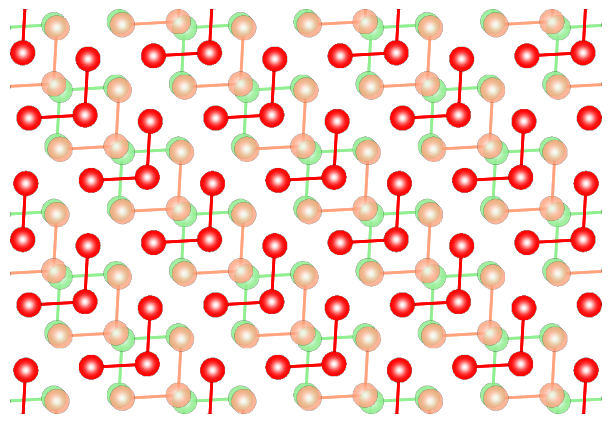

In [8]:
# Plot setup
plt.figure(figsize=(6, 6), layout='constrained')
plt.xlim(-4.75, 4.75), plt.ylim(-3.25, 3.25)
plt.axis('off')

# Calculation limits
xlim = [-5.5, 5.5]
ylim = [-5.5, 5.5]

# Parameters
resolution = 1000
radius = 0.2

# Layer 1 - light green
centers = np.stack((rM1.flatten(), rN1.flatten())).T
radii = radius * np.ones(len(centers))
cmap = LinearSegmentedColormap.from_list("cmap", ['lightgreen', "white"])
gauplot(centers, radii, xlim, ylim, cmap=cmap, zorder=5, alpha=0.9, resolution=resolution)
draw_bonds(rM1.flatten(), rN1.flatten(), 0.95, color=cmap(0), linestyle='-', lw=2, alpha=0.9)

# Layer 2 - orange
centers = np.stack((rM2.flatten(), rN2.flatten())).T
radii = radius * np.ones(len(centers))
cmap = LinearSegmentedColormap.from_list("cmap", ['lightsalmon', "white"])
gauplot(centers, radii, xlim, ylim, cmap=cmap, zorder=6, alpha=0.8, resolution=resolution)
draw_bonds(rM2.flatten(), rN2.flatten(), 0.95, color=cmap(0), linestyle='-', lw=2, alpha=0.8)

# Layer 3 - blue
c = 'blue' if alpha3 > 0 else 'red'
centers = np.stack((rM3.flatten(), rN3.flatten())).T
radii = radius * np.ones(len(centers))
cmap = LinearSegmentedColormap.from_list("cmap", [c, "white"])
gauplot(centers, radii, xlim, ylim, cmap=cmap, zorder=7, resolution=resolution)
draw_bonds(rM3.flatten(), rN3.flatten(), 0.95, color=cmap(0), linestyle='-', lw=2)

plt.show()

## Fig. S12a

In [9]:
# PLD parameters
q = 2 * np.pi / 3
alpha = 0.15
theta_x = 0 * np.pi
theta_y = 2 * np.pi / 3

# Grid
num = 4
n = np.arange(-num, num+1, dtype=float)
M, N = np.meshgrid(n, n)

# Equilibrium positions
rM0 = M
rN0 = N

# Displacemenets
uM = 2*alpha/np.sqrt(3)*np.sin(q*(rM0+rN0)+ theta_x)
uN = 2*alpha/np.sqrt(3)*np.sin(q*(rM0+rN0)+ theta_y)

# Displaced positions
rM = rM0 + uM
rN = rN0 + uN

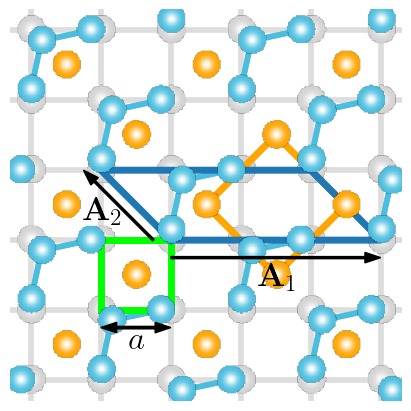

In [10]:
# Plot setup
latex_fig_param()
xlim = [-2.3, 3.3]
ylim = [-2.3, 3.3]
plt.figure(figsize=(4, 4), layout='constrained')
plt.axis('off')
plt.xlim(xlim)
plt.ylim(ylim)

# Parameters
resolution = 300
radius = 0.2

# Undistorted square lattice
centers = np.stack((rM0.flatten(), rN0.flatten())).T
radii = radius * np.ones(len(centers))
cmap = LinearSegmentedColormap.from_list("cmap", ['lightgray', "white"])
gauplot(centers, radii, xlim, ylim, cmap=cmap, zorder=7, resolution=resolution)
draw_bonds(rM0.flatten(), rN0.flatten(), 1.01, color=cmap(0), linestyle='-', lw=4, alpha=0.5)

# V-shaped Te trimers
centers = np.stack((rM.flatten(), rN.flatten())).T
radii = radius * np.ones(len(centers))
cmap = LinearSegmentedColormap.from_list("cmap", [(75/255, 190/255, 223/255), "white"])
gauplot(centers, radii, xlim, ylim, cmap=cmap, zorder=10, resolution=resolution)
draw_bonds(rM.flatten(), rN.flatten(), 1.01, color=cmap(0), linestyle='-', lw=4, alpha=1)

# Eu atoms
rMEu = (rM0 + 0.5)
rNEu = (rN0 + 0.5)
centers = np.stack((rMEu.flatten()[::2], rNEu.flatten()[::2])).T
radii = radius * np.ones(len(centers))
cmap = LinearSegmentedColormap.from_list("cmap", ["orange", "white"])
gauplot(centers, radii, xlim, ylim, cmap=cmap, zorder=10, resolution=resolution)

# Unit cells
# Square lattice
plt.plot([-1, -1, 0, 0, -1], [-1, 0, 0, -1, -1], color='lime', lw=5, ls='-', zorder=8)
# Including Eu atoms
plt.plot([0.5, 1.5, 2.5, 1.5, 0.5], [0.5, -0.5, 0.5, 1.5, 0.5], color='orange', lw=5, ls='-', zorder=8)
# Distorted lattice
plt.plot([0, 3, 2, -1, 0], [0, 0, 1, 1, 0], color='tab:blue', lw=5, ls='-', zorder=8)

# Lattice constant a
plt.arrow(0.1 - 1, -0.25 - 1,  0.9, 0, width=0.03, length_includes_head=True, zorder=12, color='k', head_width=0.15)
plt.arrow(0.9 - 1, -0.25 - 1, -0.9, 0, width=0.03, length_includes_head=True, zorder=12, color='k', head_width=0.15)
plt.text(0.4 - 1, -0.55 - 1, '$a$')

# Primitive translation vectors
plt.arrow(0 ,-0.25, 3, 0, width=0.03, length_includes_head=True, zorder=12, color='k', head_width=0.15)
plt.text(1.25 , -0.65, r'$\mathbf{A}_1$', zorder=12)
plt.arrow(-0.25 , 0 , -1, 1, width=0.03, length_includes_head=True, zorder=12, color='k',  head_width=0.15)
plt.text(-1.25 , 0.3, r'$\mathbf{A}_2$', zorder=12)

plt.show()

## Fig. S12b

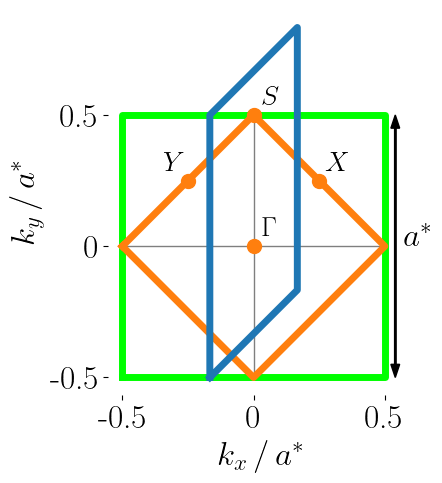

In [11]:
# Plot setup
latex_fig_param()
plt.figure(figsize=(5, 5))
plt.gca().set_aspect('equal')

# Crosshair
plt.hlines(0, -np.pi, np.pi, colors='k', linestyles='-', lw=1, alpha=0.5)
plt.vlines(0, -np.pi, np.pi, colors='k', linestyles='-', lw=1, alpha=0.5)

# 2D FBZ (green)
plt.plot([-np.pi, -np.pi, np.pi, np.pi, -np.pi], [-np.pi, np.pi, np.pi, -np.pi, -np.pi], ls='-', lw=5, c='lime')

# 2D RBZ (blue)
plt.plot(np.array([0, 2*np.pi/3, 2*np.pi/3, 0, 0]) - np.pi/3, np.array([0, 2*np.pi/3, 8*np.pi/3, 6*np.pi/3, 0]) - 3*np.pi/3, ls='-', lw=5, c='tab:blue', zorder=10)

# 3D FBZ (orange)
plt.plot([-np.pi, 0, np.pi, 0, -np.pi], [0, np.pi, 0, -np.pi, 0], ls='-', lw=5, c='tab:orange')

# 3D FBZ high symmetry points and labels
plt.plot([0, np.pi/2, 0, -np.pi/2], [0, np.pi/2, np.pi, np.pi/2], marker='o', ls='', c='tab:orange', markersize=10)

plt.text(0.4,      0.4,         r"$\Gamma$", fontsize=20, horizontalalignment='center', verticalalignment='center', zorder=10) # Gamma
plt.text(np.pi/2 + 0.4, np.pi/2 + 0.4, r"$X$",      fontsize=20, horizontalalignment='center', verticalalignment='center', zorder=10) # X
plt.text(-np.pi/2 - 0.4, np.pi/2 + 0.4,  r"$Y$",      fontsize=20, horizontalalignment='center', verticalalignment='center', zorder=10) # Y
plt.text(0.4,   np.pi + 0.4,        r"$S$",      fontsize=20, horizontalalignment='center', verticalalignment='center', zorder=10) # S

# Axes
plt.xticks([-np.pi, 0, np.pi], [-0.5, 0, 0.5])
plt.yticks([-np.pi, 0, np.pi], [-0.5, 0, 0.5])
plt.xlabel(r"$k_x \,/\, a^*$")
plt.ylabel(r"$k_y \,/\, a^*$")

# Turn off top and right axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Reciprocal lattice constant a^*
plt.arrow(np.pi + 0.25, -np.pi + 0.1, 0, 2 * np.pi - 0.1, width=0.03, length_includes_head=True, color='k', head_width=0.21)
plt.arrow(np.pi + 0.25, np.pi  - 0.1, 0, -2 * np.pi + 0.1, width=0.03, length_includes_head=True, color='k', head_width=0.21)
plt.text(np.pi+0.45, 0, '$a^*$')

plt.show()